In [1]:
#!/usr/bin/env python

*********************************************************************<br>
PROGRAM TO PLOT LOAD LOVE NUMBERS (OUTPUT FROM run_ln.py)<br>
<br>
Copyright (c) 2014-2019: HILARY R. MARTENS, LUIS RIVERA, MARK SIMONS         <br>
<br>
This file is part of LoadDef.<br>
<br>
   LoadDef is free software: you can redistribute it and/or modify<br>
   it under the terms of the GNU General Public License as published by<br>
   the Free Software Foundation, either version 3 of the License, or<br>
   any later version.<br>
<br>
   LoadDef is distributed in the hope that it will be useful,<br>
   but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
   GNU General Public License for more details.<br>
<br>
   You should have received a copy of the GNU General Public License<br>
   along with LoadDef.  If not, see <https://www.gnu.org/licenses/>.<br>
<br>
*********************************************************************

MODIFY PYTHON PATH TO INCLUDE 'LoadDef' DIRECTORY

In [2]:
from __future__ import print_function
import sys
import os
sys.path.append(os.getcwd() + "/../../")

Import Python Modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Input Parameters

In [4]:
lln_file = ("../../output/Love_Numbers/LLN/lln_PREM.txt")
figname = ("LLN_PREM.pdf")
asym = True; # Are asymptotic values included in input file? True=Yes; False=No
 
#### Begin Code

Create Folder

In [5]:
if not (os.path.isdir("./output/")):
    os.makedirs("./output/")
outdir = "./output/"

Read Files

In [6]:
if (asym == 1):
    n,h,nl,nk,hp,nlp,nkp = np.loadtxt(lln_file,delimiter=None,unpack=True,skiprows=14,usecols=(0,1,2,3,4,5,6))
else:
    n,h,nl,nk = np.loadtxt(lln_file,delimiter=None,unpack=True,skiprows=14,usecols=(0,1,2,3))

Convert Spherical Harmonic Degrees to Log Space

In [9]:
n_neq0 = np.where(n != 0); n_neq0 = n_neq0[0]
logn = np.zeros((len(n),))
logn[n_neq0] = np.log10(n[n_neq0])

Plot

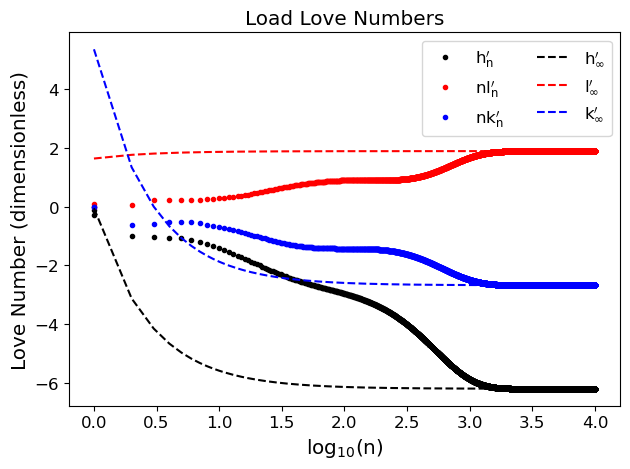

In [10]:
plt.plot(logn,h,'k.',ms=6,label=r'$\mathrm{h^\prime_n}$')
plt.plot(logn,nl,'r.',ms=6,label=r'$\mathrm{nl^\prime_n}$')
plt.plot(logn,nk,'b.',ms=6,label=r'$\mathrm{nk^\prime_n}$')
plt.tick_params(labelsize='large')
# Optionally Plot the Asymptotic Values, If Provided
if (asym == 1):
    plt.plot(logn,hp,'k--',label=r'$\mathrm{h^\prime_\infty}$')
    plt.plot(logn,nlp,'r--',label=r'$\mathrm{l^\prime_\infty}$')
    plt.plot(logn,nkp,'b--',label=r'$\mathrm{k^\prime_\infty}$')
plt.legend(loc='best',fontsize='large',ncol=2)
plt.title('Load Love Numbers',fontsize = 'x-large')
plt.xlabel(r'$\mathrm{log}_{10}\mathrm{(n)}$',fontsize='x-large')
plt.ylabel('Love Number (dimensionless)',fontsize='x-large')
plt.tight_layout()
plt.savefig((outdir+figname),orientation='portrait',format='pdf')
plt.show()